# Predict if a customer will leave the company !

using the [chrurn dataset](https://www.kaggle.com/filemide/churns#churn_train.csv) investigate the features and there affect on the customer.

then build a logistic regression classifier to predict if a given customer will churn or not !

![churn](chrun.jpeg)

In [1]:
# import first
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# change the style from the very beging
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('churn_train.csv')
df.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0038,117,3.90,49.6700,0.00,38.75,6.941061e+03,1,0,1092,1,0,2,1,1,0
1,ADF0039,123,4.10,76.7140,0.00,1.25,1.495100e+00,14,564,6408,2,1,1,5,1,0
2,ADF0040,1342,44.73,76.9200,11.96,1.25,7.514600e+00,5,251,1004,2,2,2,3,1,0
3,ADF0041,1316,43.87,98.8904,4.14,1.25,1.024400e+00,27,1626,4373,1,1,1,5,1,0
4,ADF0042,247,8.23,152.9120,0.02,15.00,3.241738e+07,6,12,1145,2,0,2,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 16 columns):
Customer ID                                    1397 non-null object
network_age                                    1397 non-null int64
Customer tenure in month                       1397 non-null float64
Total Spend in Months 1 and 2 of 2017          1397 non-null float64
Total SMS Spend                                1397 non-null float64
Total Data Spend                               1397 non-null float64
Total Data Consumption                         1397 non-null float64
Total Unique Calls                             1397 non-null int64
Total Onnet spend                              1397 non-null int64
Total Offnet spend                             1397 non-null int64
Total Call centre complaint calls              1397 non-null int64
Network type subscription in Month 1           1397 non-null int64
Network type subscription in Month 2           1397 non-null int64
Most Loved 

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
network_age,1397.0,1.451238e+03,1.276683e+03,-5.0000,288.0000,1174.0000,2241.000,5451.00
Customer tenure in month,1397.0,4.837460e+01,4.255603e+01,-0.1700,9.6000,39.1300,74.700,181.70
Total Spend in Months 1 and 2 of 2017,1397.0,8.009273e+02,1.246107e+03,4.9100,155.4460,605.3300,1015.860,24438.83
Total SMS Spend,1397.0,3.021840e+01,6.071848e+01,0.0000,2.6200,13.7100,31.070,873.98
Total Data Spend,1397.0,5.757084e+01,2.886551e+02,0.0000,1.2500,10.0000,42.500,8295.00
Total Data Consumption,1397.0,2.164014e+06,6.872994e+06,0.0586,1358.5557,118357.4561,1205828.366,99456402.05
Total Unique Calls,1397.0,2.023622e+02,3.021712e+02,1.0000,18.0000,81.0000,254.000,2596.00
Total Onnet spend,1397.0,6.754324e+03,1.663624e+04,0.0000,60.0000,1608.0000,7155.000,381174.00
Total Offnet spend,1397.0,1.549037e+04,3.686521e+04,0.0000,1123.0000,4168.0000,13132.000,431440.00
Total Call centre complaint calls,1397.0,1.921976e+00,2.347115e+00,1.0000,1.0000,1.0000,2.000,49.00


In [5]:
df.isna().sum()

Customer ID                                    0
network_age                                    0
Customer tenure in month                       0
Total Spend in Months 1 and 2 of 2017          0
Total SMS Spend                                0
Total Data Spend                               0
Total Data Consumption                         0
Total Unique Calls                             0
Total Onnet spend                              0
Total Offnet spend                             0
Total Call centre complaint calls              0
Network type subscription in Month 1           0
Network type subscription in Month 2           0
Most Loved Competitor network in in Month 1    0
Most Loved Competitor network in in Month 2    0
Churn Status                                   0
dtype: int64

In [6]:
df.dtypes

Customer ID                                     object
network_age                                      int64
Customer tenure in month                       float64
Total Spend in Months 1 and 2 of 2017          float64
Total SMS Spend                                float64
Total Data Spend                               float64
Total Data Consumption                         float64
Total Unique Calls                               int64
Total Onnet spend                                int64
Total Offnet spend                               int64
Total Call centre complaint calls                int64
Network type subscription in Month 1             int64
Network type subscription in Month 2             int64
Most Loved Competitor network in in Month 1      int64
Most Loved Competitor network in in Month 2      int64
Churn Status                                     int64
dtype: object

In [7]:
# check how many unique values each feature has:
for column in df.columns:
    print(column, len(df[column].unique()))

Customer ID 1397
network_age 1035
Customer tenure in month 1035
Total Spend in Months 1 and 2 of 2017 1384
Total SMS Spend 710
Total Data Spend 238
Total Data Consumption 1391
Total Unique Calls 503
Total Onnet spend  849
Total Offnet spend 1124
Total Call centre complaint calls 19
Network type subscription in Month 1 3
Network type subscription in Month 2 3
Most Loved Competitor network in in Month 1 7
Most Loved Competitor network in in Month 2 6
Churn Status 2


In [8]:
corr = df.corr()['Churn Status']
corr

network_age                                   -0.123000
Customer tenure in month                      -0.122999
Total Spend in Months 1 and 2 of 2017         -0.033969
Total SMS Spend                                0.096018
Total Data Spend                               0.033798
Total Data Consumption                        -0.142370
Total Unique Calls                            -0.135427
Total Onnet spend                             -0.009020
Total Offnet spend                             0.098200
Total Call centre complaint calls             -0.072330
Network type subscription in Month 1          -0.047296
Network type subscription in Month 2          -0.068694
Most Loved Competitor network in in Month 1   -0.065399
Most Loved Competitor network in in Month 2   -0.249520
Churn Status                                   1.000000
Name: Churn Status, dtype: float64

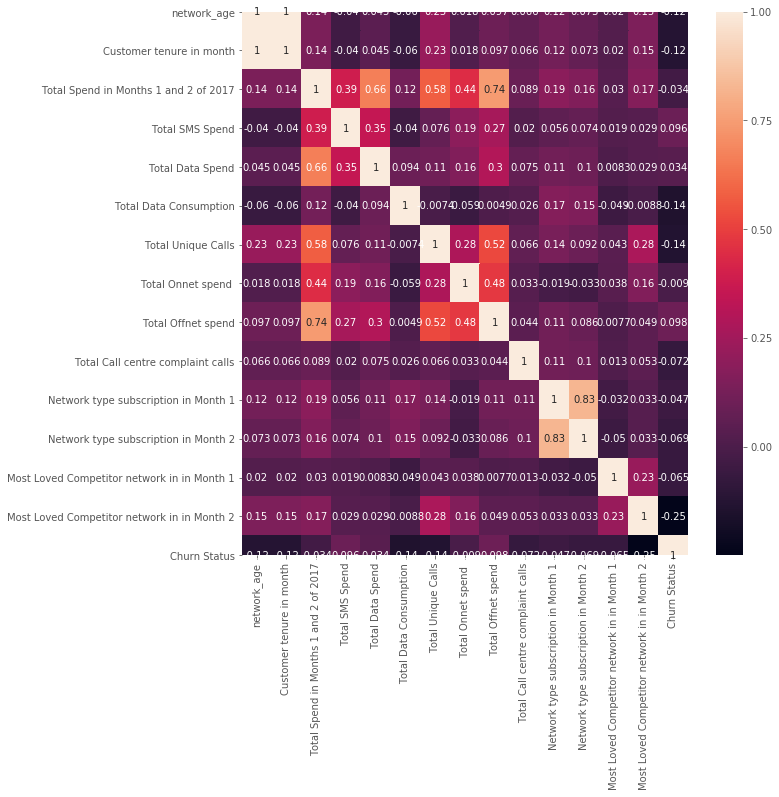

In [9]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,annot=True)

In [10]:
df.drop('Customer ID' , inplace=True , axis=1)
df

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,117,3.90,49.6700,0.00,38.75,6.941061e+03,1,0,1092,1,0,2,1,1,0
1,123,4.10,76.7140,0.00,1.25,1.495100e+00,14,564,6408,2,1,1,5,1,0
2,1342,44.73,76.9200,11.96,1.25,7.514600e+00,5,251,1004,2,2,2,3,1,0
3,1316,43.87,98.8904,4.14,1.25,1.024400e+00,27,1626,4373,1,1,1,5,1,0
4,247,8.23,152.9120,0.02,15.00,3.241738e+07,6,12,1145,2,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,161,5.37,1109.1980,22.64,6.25,9.781816e+02,385,11700,67635,1,0,0,3,3,1
1393,1458,48.60,1449.8700,0.00,20.00,8.781532e+06,170,4104,77050,1,1,1,3,3,1
1394,345,11.50,1659.2812,9.56,140.00,4.695170e+07,150,168,33614,1,2,2,5,3,1
1395,1272,42.40,1932.6000,75.85,56.25,1.861878e+05,220,10087,88726,1,2,2,3,3,1


In [11]:
df=pd.get_dummies(df,columns=['Most Loved Competitor network in in Month 1','Most Loved Competitor network in in Month 2',
                                     'Network type subscription in Month 1','Network type subscription in Month 2'] )

In [12]:
x = df.drop('Churn Status',axis=1)
x

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,...,Most Loved Competitor network in in Month 2_3,Most Loved Competitor network in in Month 2_4,Most Loved Competitor network in in Month 2_5,Most Loved Competitor network in in Month 2_6,Network type subscription in Month 1_0,Network type subscription in Month 1_1,Network type subscription in Month 1_2,Network type subscription in Month 2_0,Network type subscription in Month 2_1,Network type subscription in Month 2_2
0,117,3.90,49.6700,0.00,38.75,6.941061e+03,1,0,1092,1,...,0,0,0,0,1,0,0,0,0,1
1,123,4.10,76.7140,0.00,1.25,1.495100e+00,14,564,6408,2,...,0,0,0,0,0,1,0,0,1,0
2,1342,44.73,76.9200,11.96,1.25,7.514600e+00,5,251,1004,2,...,0,0,0,0,0,0,1,0,0,1
3,1316,43.87,98.8904,4.14,1.25,1.024400e+00,27,1626,4373,1,...,0,0,0,0,0,1,0,0,1,0
4,247,8.23,152.9120,0.02,15.00,3.241738e+07,6,12,1145,2,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,161,5.37,1109.1980,22.64,6.25,9.781816e+02,385,11700,67635,1,...,1,0,0,0,1,0,0,1,0,0
1393,1458,48.60,1449.8700,0.00,20.00,8.781532e+06,170,4104,77050,1,...,1,0,0,0,0,1,0,0,1,0
1394,345,11.50,1659.2812,9.56,140.00,4.695170e+07,150,168,33614,1,...,1,0,0,0,0,0,1,0,0,1
1395,1272,42.40,1932.6000,75.85,56.25,1.861878e+05,220,10087,88726,1,...,1,0,0,0,0,0,1,0,0,1


In [13]:
y = df.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       1
       ..
1392    0
1393    0
1394    1
1395    1
1396    0
Name: Network type subscription in Month 2_2, Length: 1397, dtype: uint8

In [14]:
# x['Total Data Consumption'] = x['Total Data Consumption'].apply(lambda x: np.log(x))
# x['Total Spend in Months 1 and 2 of 2017'] = x['Total Spend in Months 1 and 2 of 2017'].apply(lambda x: np.log(x))
# x

In [15]:
# standrize the values
from sklearn.preprocessing import StandardScaler , MinMaxScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 ,random_state=0)

In [17]:
# from sklearn.linear_model import LogisticRegression
# cl = LogisticRegression(random_state = 0)
# # cl.fit(x_train,y_train)
# from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
# cl = GaussianNB()
# cl.fit(x_train,y_train)

In [18]:
from sklearn.neighbors import KNeighborsClassifier 
cl = KNeighborsClassifier(n_neighbors = 22)
cl.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, cl.predict(x_test))
pd.DataFrame(cm)

,0,1
0,135,6
1,2,137


In [20]:
cl.score(x_test,y_test)

0.9714285714285714